old parameter: [[ 0.44018429]
 [-0.37277584]
 [-0.34498385]]
error: 27.883049222764008

[[ 0.31081798]
 [ 0.00903608]
 [-0.28142837]]


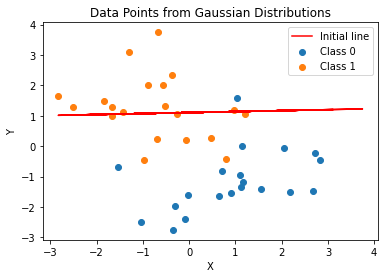

[[ 0.14595089]
 [-0.04838673]
 [ 0.63668109]]


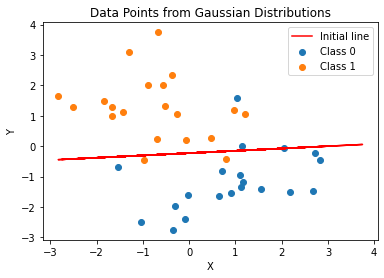

[[-0.03843823]
 [-0.24582925]
 [ 1.0163247 ]]


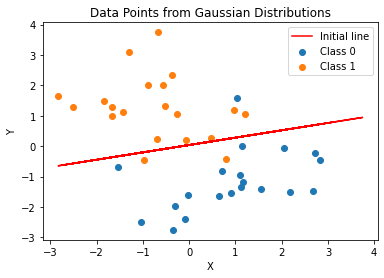

[[ 0.06389962]
 [-0.13797747]
 [ 1.33201059]]


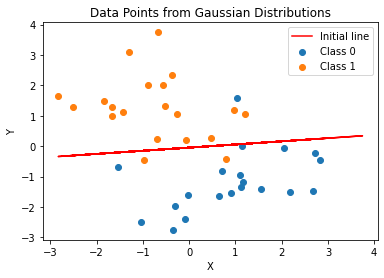

[[ 0.11453285]
 [-0.23281248]
 [ 1.48312276]]


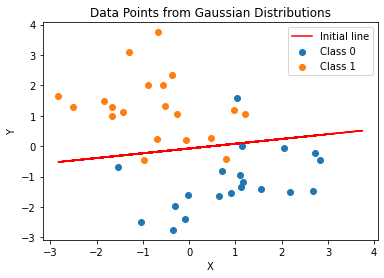

[[-0.13594525]
 [-0.64968509]
 [ 1.54123647]]


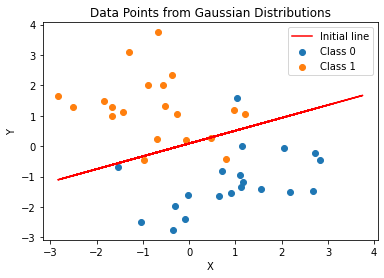

[[-0.14407607]
 [-0.64943127]
 [ 1.57865729]]


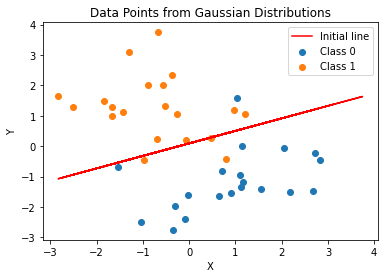

[[-0.20305732]
 [-0.713132  ]
 [ 1.63392879]]


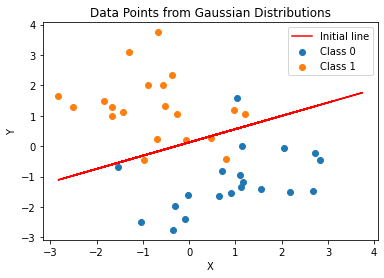

[[ 0.02717246]
 [-0.48985955]
 [ 1.8222631 ]]


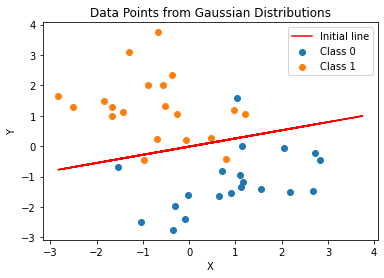

[[ 0.01713917]
 [-0.49000852]
 [ 1.88968019]]


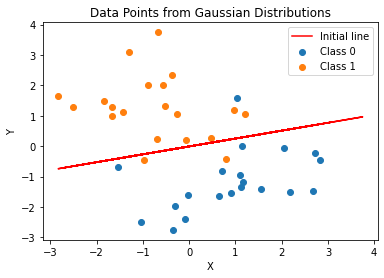

[[-0.01375558]
 [-0.54263684]
 [ 1.9508894 ]]


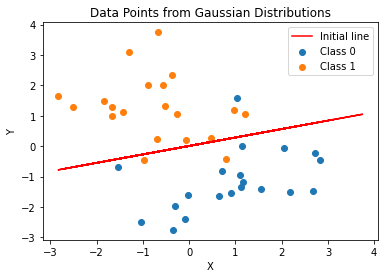

[[ 0.28886338]
 [-0.44387556]
 [ 2.02789927]]


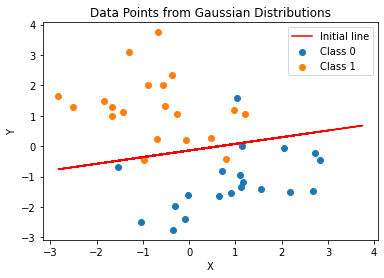

[[ 0.28790098]
 [-0.51984803]
 [ 2.08879812]]


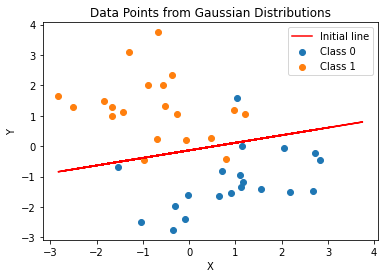

[[ 0.80082303]
 [-0.16400118]
 [ 1.93203263]]


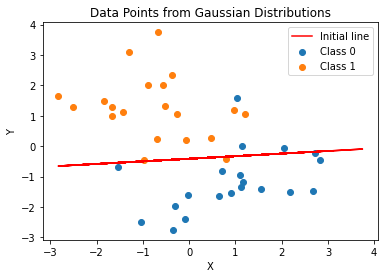

[[ 0.41257486]
 [-0.87235992]
 [ 1.96833115]]


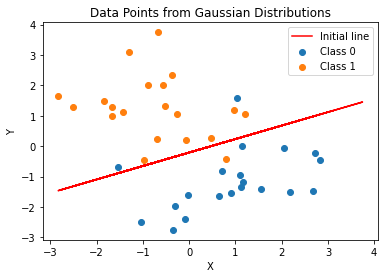

[[ 0.51195008]
 [-0.98172824]
 [ 2.02984791]]


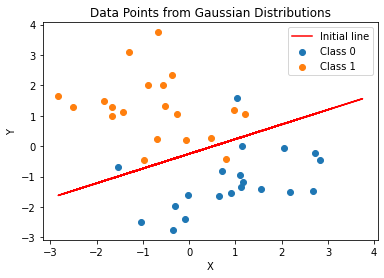

[[ 0.16963128]
 [-1.64715328]
 [ 1.20373741]]


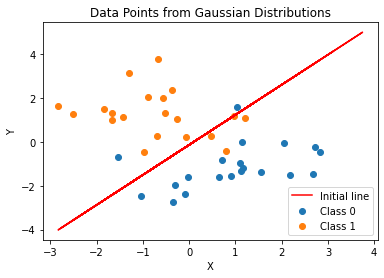

[[ 0.16721582]
 [-1.67482814]
 [ 1.21196243]]


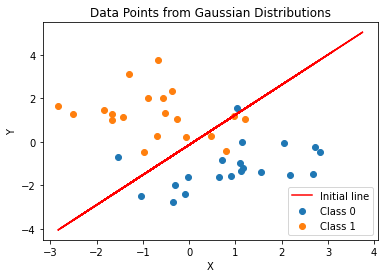

[[ 0.14099257]
 [-1.70020012]
 [ 1.2528212 ]]


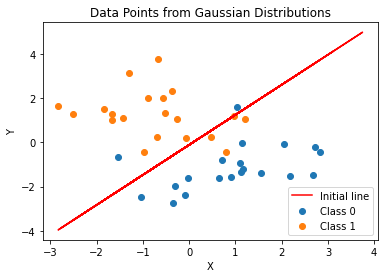

[[ 0.13897836]
 [-1.71466409]
 [ 1.25650744]]


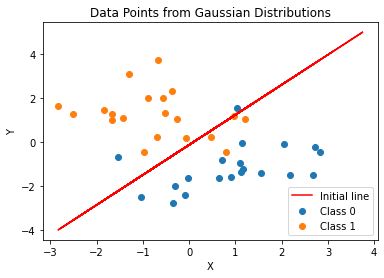

new parameter: [[ 0.13897836]
 [-1.71466409]
 [ 1.25650744]]
error: 127.95317233570849


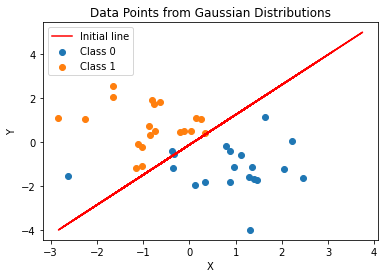

confusion matrix
[[17.  0.]
 [ 3. 20.]]
accuracy is 92.5%


In [305]:
#1
import numpy as np
import matplotlib.pyplot as plt
import math 
import copy


TotalNormal1=np.random.multivariate_normal(np.array([1,-1]),np.eye(2),60)
TotalNormal2=np.random.multivariate_normal(np.array([-1,1]),np.eye(2),60)



Gauss1=TotalNormal1[:20]
Gauss2=TotalNormal2[:20]

GaussVal1=TotalNormal1[20:40]
GaussVal2=TotalNormal2[20:40]

GaussTest1=TotalNormal1[40:]
GaussTest2=TotalNormal2[40:]

##########################################

theta=np.random.uniform(-0.5,0.5,[3,1])
thetaCopy= copy.deepcopy(theta)

# x1_range = np.append(Gauss1,Gauss2)

# x2_range = -(theta[0] + theta[1]*x1_range) / theta[2] # solving in terms of x2 

##################################
#2b
def Logistic(val):
    return 1/(1+np.exp(-val))

def h0_x(params,Gauss):# only done for class 0
    h0=np.array([])

    for i in range(len(Gauss)):
        z= params[0]+params[1]*Gauss[i][0]+ params[2]*Gauss[i][1]
        h0=np.append(h0,Logistic(z))

    return h0

import math

def likelihood(h01, h02):
    likelihood_1 = np.log(h01).sum()
    likelihood_2 = np.log(1 - h02).sum()
    return -(likelihood_1 + likelihood_2)

    



#confusion matrix , if probababilty<0.5 class 0 else class1


def confusion(Gauss,classNum,params):
    confusion = np.zeros((2,2))# rows= predicted 0 1, cols=actual 0 1
    for i in range(len(Gauss)):
        z= params[0]+params[1]*Gauss[i][0]+ params[2]*Gauss[i][1]

        if Logistic(z)<0.5:#predicted class 0
            if classNum==0:
                confusion[0][0]+=1
            else:
                confusion[0][1]+=1
        else:#preicted class is 1
            if classNum==0:
                confusion[1][0]+=1
            else:
                confusion[1][1]+=1
        
    return confusion


# conf1=confusion(GaussTest1,0,theta)
# conf2=confusion(GaussTest2,1,theta)

# finalconf=np.ones((2,2))
# finalconf[:,0]=conf1[:,0]
# finalconf[:,1]=conf2[:,1]

# print("confusion matrix")

# print(finalconf)

# accuracy=(finalconf[0][0]+finalconf[1][1])/40 *100

# print("accuracy is "+ str(accuracy)+"%")


######################################
theta=thetaCopy
Old_theta=theta
print("old parameter: "+str(Old_theta))
print("error: "+str(likelihood(h0_x(theta,Gauss1),h0_x(theta,Gauss2))))
print()




alpha=0.7
count=0
e=0.00005

temp=np.array(theta)

while np.linalg.norm(theta-temp)<e :




    for i in range(len(Gauss1)):

    #class 0
        temp= copy.deepcopy(theta)



        theta[0]=theta[0]-alpha* (h0_x(theta,Gauss1)[i]-0)
        theta[1]=theta[1]-alpha* (h0_x(theta,Gauss1)[i]*Gauss1[i][0])
        theta[2]=theta[2]-alpha* (h0_x(theta,Gauss1)[i]*Gauss1[i][1])


        #class1
        theta[0]=theta[0]-alpha* (h0_x(theta,Gauss2)[i]-1)
        theta[1]=theta[1]-alpha* ((h0_x(theta,Gauss2)[i]-1)*Gauss2[i][0])
        theta[2]=theta[2]-alpha* ((h0_x(theta,Gauss2)[i]-1)*Gauss2[i][1])
        count+=1
        print(theta)

        x1_range = np.append(Gauss1,Gauss2)

        x2_range = -(theta[0] + theta[1]*x1_range) / theta[2] # solving in terms of x2 





        plt.plot(x1_range, x2_range, label='Initial line', color='red')


        plt.scatter(Gauss1[:, 0], Gauss1[:, 1], label='Class 0')
        plt.scatter(Gauss2[:, 0], Gauss2[:, 1], label='Class 1')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Data Points from Gaussian Distributions')
        plt.legend()
        plt.show()
        

   
print("new parameter: "+ str(theta))
print("error: "+str(likelihood(h0_x(theta,Gauss1),h0_x(theta,Gauss2))))

x1_range = np.append(Gauss1,Gauss2)

x2_range = -(theta[0] + theta[1]*x1_range) / theta[2] # solving in terms of x2 







plt.plot(x1_range, x2_range, label='Initial line', color='red')


plt.scatter(GaussVal1[:, 0], GaussVal1[:, 1], label='Class 0')
plt.scatter(GaussVal2[:, 0], GaussVal2[:, 1], label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points from Gaussian Distributions')
plt.legend()
plt.show()

conf1=confusion(GaussVal1,0,theta)
conf2=confusion(GaussVal2,1,theta)

finalconf=np.ones((2,2))
finalconf[:,0]=conf1[:,0]
finalconf[:,1]=conf2[:,1]

print("confusion matrix")

print(finalconf)

accuracy=(finalconf[0][0]+finalconf[1][1])/40 *100

print("accuracy is "+ str(accuracy)+"%")

new parameter: [[ 0.13897836]
 [-1.71466409]
 [ 1.25650744]]
error: 127.95317233570849


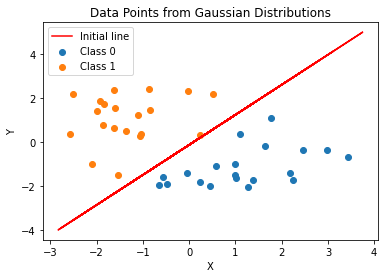

confusion matrix
[[20.  0.]
 [ 0. 20.]]
accuracy is 100.0%


In [306]:
print("new parameter: "+ str(theta))
print("error: "+str(likelihood(h0_x(theta,Gauss1),h0_x(theta,Gauss2))))

x1_range = np.append(Gauss1,Gauss2)

x2_range = -(theta[0] + theta[1]*x1_range) / theta[2] # solving in terms of x2 







plt.plot(x1_range, x2_range, label='Initial line', color='red')


plt.scatter(GaussTest1[:, 0], GaussTest1[:, 1], label='Class 0')
plt.scatter(GaussTest2[:, 0], GaussTest2[:, 1], label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points from Gaussian Distributions')
plt.legend()
plt.show()

conf1=confusion(GaussTest1,0,theta)
conf2=confusion(GaussTest2,1,theta)

finalconf=np.ones((2,2))
finalconf[:,0]=conf1[:,0]
finalconf[:,1]=conf2[:,1]

print("confusion matrix")

print(finalconf)

accuracy=(finalconf[0][0]+finalconf[1][1])/40 *100

print("accuracy is "+ str(accuracy)+"%")